In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime
import requests

In [ ]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
coordinates = list(zip(lats,lngs))
coordinates[:10]


In [ ]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0],coord[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
num_cities = len(cities)
num_cities

In [ ]:
# Create an empty lkist to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters for records, sets
record_count = 1
set_count = 1

# Basic URL with API key
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [ ]:
# Loop through all the cities in our list.
for ii, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes.
    if (ii % 50 == 0 and ii >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city.
    print(f'Processing record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into the city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    
    # If and error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Check the number of cities for which there are data.
num_proc_cities = len(city_data)
print(f"Found data for {num_proc_cities} cities out of {num_cities} total cities.")

In [ ]:
# Convert city data to data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
# Reorder the columns in the data frame
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

In [ ]:
# Create output CSV
output_csv_file = "weather_data/cities.csv"

# Save the csv file so we don't have to run all these API requests again!
city_data_df.to_csv(output_csv_file,index_label='City ID')

## Run from here after gathering data

In [4]:
# Read in gathered and saved data so we don't have to spend 10 minutes everytime we need to restart the kernel...
city_data_df = pd.read_csv("weather_data/cities.csv",index_col='City ID')
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City ID,,,,,,,,,
0,Jamestown,US,2022-11-21 18:39:02,42.0970,-79.2353,39.18,34,0,19.57
1,San Jose,US,2022-11-21 18:40:06,37.3394,-121.8950,64.42,49,75,5.01
2,Flinders,AU,2022-11-21 18:40:46,-34.5833,150.8552,53.19,58,2,11.99
3,Sibu,MY,2022-11-21 18:40:47,2.3000,111.8167,77.31,88,40,5.01
4,Mataura,NZ,2022-11-21 18:40:47,-46.1927,168.8643,50.49,84,57,3.06
...,...,...,...,...,...,...,...,...,...
549,Chimoio,MZ,2022-11-21 18:57:06,-19.1164,33.4833,69.66,82,75,2.26
550,Manado,ID,2022-11-21 18:58:07,1.4870,124.8455,77.77,100,40,2.30
551,Krasnoselkup,RU,2022-11-21 18:58:07,65.7000,82.4667,-18.54,94,20,10.78


In [16]:
# Extract relevant fields form the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [18]:
today = time.strftime('%x')
today

'11/21/22'

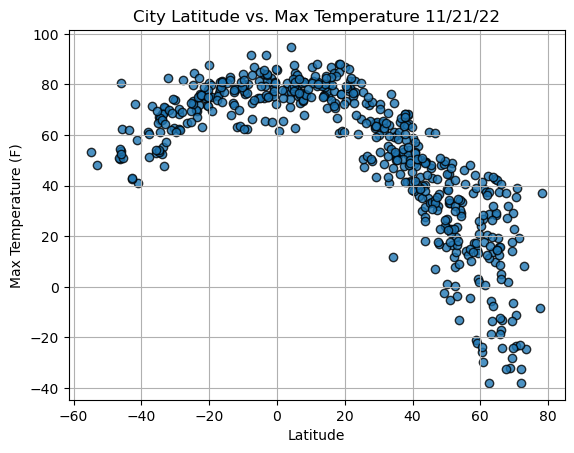

In [19]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("weather_data/Fig1.png")
plt.show()

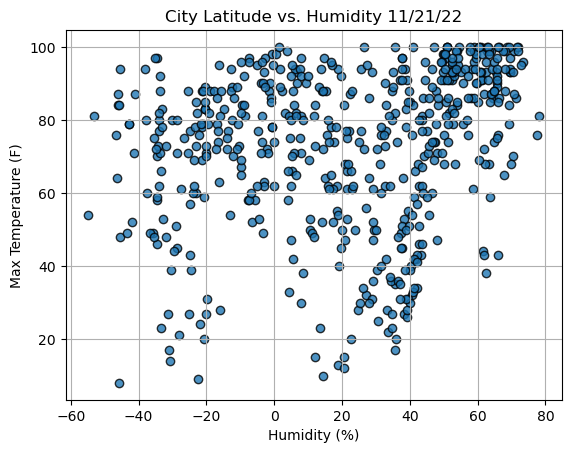

In [20]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Humidity (%)")
plt.grid(True)

# Save and show plot
plt.savefig("weather_data/Fig2.png")
plt.show()

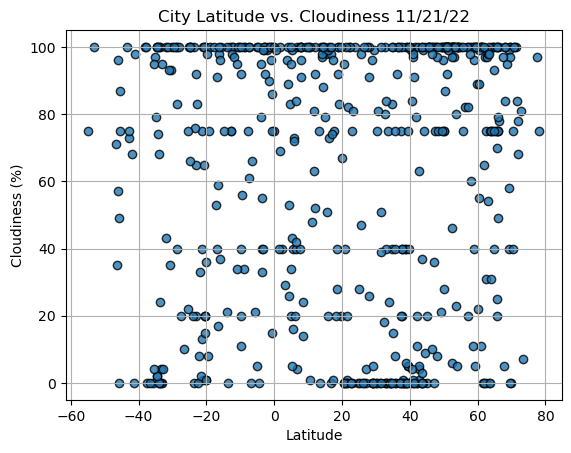

In [21]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness ' + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("weather_data/Fig3.png")
plt.show()

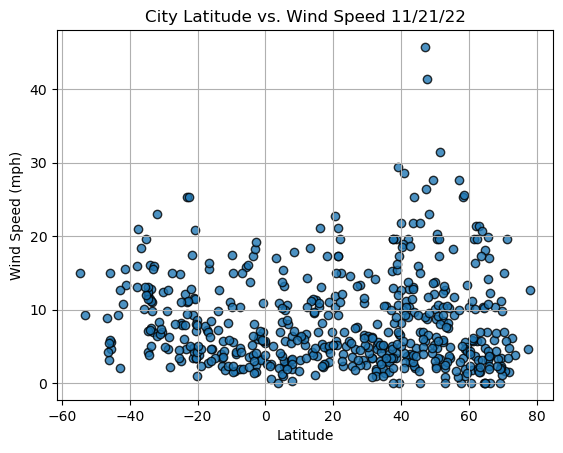

In [22]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("weather_data/Fig4.png")
plt.show()